In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from itertools import chain
from collections import defaultdict
from sklearn.utils import shuffle
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from spacy import displacy
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import  accuracy_score,classification_report, confusion_matrix  #for visualizing tree 
import scipy
from scipy.sparse import hstack
from scipy.sparse import coo_matrix
from scipy import sparse
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup
import pickle as cPickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense,Concatenate, TimeDistributed,Layer
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')


In [4]:
 summ_df = pd.read_csv('/content/drive/MyDrive/summ_df.csv',index_col=0)

In [5]:
summ_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 1008
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titles     1004 non-null   object
 1   abstracts  924 non-null    object
 2   sections   946 non-null    object
 3   summaries  1009 non-null   object
 4   citations  1009 non-null   object
dtypes: object(5)
memory usage: 47.3+ KB


In [6]:
summ_df.dropna(inplace=True)

In [7]:
summ_df.head()

,titles,abstracts,sections,summaries,citations
0,TnT - A Statistical Part-Of-Speech Tagger,Trigrams'n'Tags (TnT) is an efficient statisti...,A large number of current language processing ...,TnT - A Statistical Part-Of-Speech Tagger\nTri...,The sentences in the DSO collection were tagge...
1,Sentence Reduction For Automatic Text Summariz...,Figure 2: Sample sentence and parse tree we ha...,Current automatic summarizers usually rely on ...,Sentence Reduction For Automatic Text Summariz...,"In fact, professional abstractors tend to use..."
2,Advances In Domain Independent Linear Text Seg...,This paper describes a method for linear text ...,Even moderately long documents typically addre...,Advances In Domain Independent Linear Text Seg...,"Choi (2000) used the rank of the cosine, rathe..."
3,A Simple Approach To Building Ensembles Of Nai...,This paper presents a corpus-based approach to...,Word sense disambiguation is often cast as a p...,A Simple Approach To Building Ensembles Of Nai...,We have presented an ensemble approach to word...
4,A Maximum-Entropy-Inspired Parser,We present a new parser for parsing down to Pe...,We present a new parser for parsing down to Pe...,A Maximum-Entropy-Inspired Parser\nWe present ...,"As a benchmark VPC extraction system, we use ..."


In [8]:
summ_df=summ_df.reset_index(drop=True)

In [9]:
summ_df["text"] = summ_df[["citations", "abstracts"]].apply(" ".join, axis=1)
display(summ_df["text"][0])

"The sentences in the DSO collection were tagged with parts of speech using TnT (Brants, 2000) trained on the Brown Corpus itself.  The English POS-tagging has been carried out using freely available TNT tagger (Brants, 2000). This proposition is quite viable as statistical POS taggers like TnT (Brants, 2000) are available. We use TnT (Brants, 2000), a second order Markov Model tagger. For PoS tagging and lemmatization, we combine GENIA (with its built-in, occasionally deviant to kenizer) and TnT (Brants, 2000), which operates on pre-tokenized inputs but in its default models trained on financial news from the Penn Tree bank. Tag the tokens with PTB-style POS tags using a tagger (Brants, 2000). For example, Petrov et al (2012) build supervised POS taggers for 22 languages using the TNT tagger (Brants, 2000), with an average accuracy of 95.2%. Forun aligned words, we simply assign a random POS and very low probability, which does not substantially affect transition probability estimates

In [27]:
# pip install bert-extractive-summarizer
# !pip install summarizer

In [10]:
from summarizer import summarize

In [30]:
# bert_model = Summarizer()
# bert_summary = ''.join(bert_model(summ_df["text"][0], min_length=50))
# print(bert_summary)

In [31]:
# print(bert_summary)

In [11]:
summ_df["short_text"]=pd.Series([])

In [12]:
for i in range(0,len(summ_df)):
  summ=" ".join(summarize(summ_df["titles"][i],summ_df["text"][i],15))
  summ_df["short_text"][i]=summ

In [13]:
summ_df.head()

,titles,abstracts,sections,summaries,citations,text,short_text
0,TnT - A Statistical Part-Of-Speech Tagger,Trigrams'n'Tags (TnT) is an efficient statisti...,A large number of current language processing ...,TnT - A Statistical Part-Of-Speech Tagger\nTri...,The sentences in the DSO collection were tagge...,The sentences in the DSO collection were tagge...,The sentences in the DSO collection were tagge...
1,Sentence Reduction For Automatic Text Summariz...,Figure 2: Sample sentence and parse tree we ha...,Current automatic summarizers usually rely on ...,Sentence Reduction For Automatic Text Summariz...,"In fact, professional abstractors tend to use...","In fact, professional abstractors tend to use...",Examples include text summarisation (Jing 2000...
2,Advances In Domain Independent Linear Text Seg...,This paper describes a method for linear text ...,Even moderately long documents typically addre...,Advances In Domain Independent Linear Text Seg...,"Choi (2000) used the rank of the cosine, rathe...","Choi (2000) used the rank of the cosine, rathe...","Choi (2000) used the rank of the cosine, rathe..."
3,A Simple Approach To Building Ensembles Of Nai...,This paper presents a corpus-based approach to...,Word sense disambiguation is often cast as a p...,A Simple Approach To Building Ensembles Of Nai...,We have presented an ensemble approach to word...,We have presented an ensemble approach to word...,We have presented an ensemble approach to word...
4,A Maximum-Entropy-Inspired Parser,We present a new parser for parsing down to Pe...,We present a new parser for parsing down to Pe...,A Maximum-Entropy-Inspired Parser\nWe present ...,"As a benchmark VPC extraction system, we use ...","As a benchmark VPC extraction system, we use ...","As a benchmark VPC extraction system, we use ..."


In [35]:
# def text_preprocess(text):
# #Converting X to format acceptable by gensim, removing annd punctuation stopwords in the process
#     clean_text_array = []
# #     print(text)
#     stop_words = set(nltk.corpus.stopwords.words("english"))
#     tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
#     for par in text:
# #         print(par)
#         tmp = []
#         sentences = nltk.sent_tokenize(par)
#         for sent in sentences:
#             sent = sent.lower()
#             tokens = tokenizer.tokenize(sent)
#             filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
# #             print(filtered_words)
#             wordnet_lemmatizer = WordNetLemmatizer() # with use of morphological analysis of words
#             text_lemma = [wordnet_lemmatizer.lemmatize(word) for word in filtered_words]
# #             print(text_lemma)
#             tmp.extend(text_lemma)
#         clean_text_array.append(tmp)
#     return clean_text_array    

In [14]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [15]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text,num):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [16]:
# summ_df['short_text']=text_preprocess(summ_df['short_text'])
# summ_df['short_text']=summ_df['short_text'].apply(lambda l: " ".join(l))

In [39]:
# summ_df['summaries']=text_preprocess(summ_df['summaries'])
# summ_df['summaries']=summ_df['summaries'].apply(lambda l: " ".join(l))

In [17]:
cleaned_text = []
for t in summ_df['short_text']:
    cleaned_text.append(text_cleaner(t,0)) 

In [18]:
# cleaned_text[:5]  

In [19]:
cleaned_summary = []
for t in summ_df['summaries']:
    cleaned_summary.append(text_cleaner(t,1))

In [127]:
# cleaned_summary[:10]

In [20]:
summ_df['cleaned_text']=cleaned_text
summ_df['cleaned_summary']=cleaned_summary

In [21]:
summ_df.replace('', np.nan, inplace=True)
summ_df.dropna(axis=0,inplace=True)

In [22]:
summ_df["cleaned_text"][0]

'sentences dso collection tagged parts speech using tnt trained brown corpus english pos tagging carried using freely available tnt tagger proposition quite viable statistical pos taggers like tnt available use tnt second order markov model tagger tag tokens ptb style pos tags using tagger example petrov et al build supervised pos taggers languages using tnt tagger average accuracy step build tagger feeding es ti mated emission transition probabilities tnt tagger implementation trigram hmm tagger also incorporated part speech tagging using tnt tagger retrained genia corpus gold standard part speech tagging freely available pos lexicon sharoff et al specifically file pos tagger tnt contains full words frequency information use corpus million words automatically tagged tnt freely available online pos tag use hmm tagger tnt model http corpus leeds ac uk mocky finishing corrections experimented training testing tnt tagger quot old quot quot corrected quot version negra texts first automati

In [22]:
# sample = summ_df.sample(frac=0.05, random_state=2)

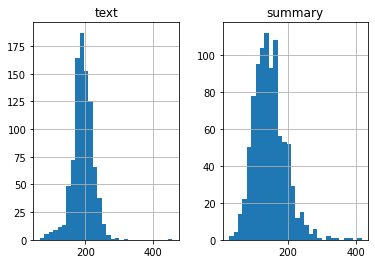

In [23]:

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in summ_df['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in summ_df['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [24]:
# sample

In [24]:
cnt=0
for i in summ_df['cleaned_text']:
    if(len(i.split())<=400):
        cnt=cnt+1
print(cnt/len(summ_df['cleaned_text']))

0.9989177489177489


In [25]:
cnt=0
for i in summ_df['cleaned_summary']:
    if(len(i.split())<=200):
        cnt=cnt+1
print(cnt/len(summ_df['cleaned_summary']))

0.8809523809523809


In [26]:
max_text_len=400
max_summary_len=200

In [27]:
cleaned_text =np.array(summ_df['cleaned_text'])
cleaned_summary=np.array(summ_df['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [28]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [29]:
df["text"][1]

'examples include text summarisation subtitle generation spoken transcripts information retrieval sentence compression task summarizing sentence retaining informational content remaining grammatical evaluation sentence reduction details used corpus sentences reduced forms human written abstracts overcome problem linguistic parsing generation systems used sentence condensation approaches knight marcu jing table shows sentence summary created using algorithm paper overcome problem linguistic parsing generation systems used sentence condensation approaches knight marcu jing sentence compression produces summary single sentence retains important information remaining grammatical figure sample sentence parse tree input sentence abcdehas parse tree shown figure human reduces sentence translated series decisions made along edges sentence parse tree shown figure extended sentence reduction program query based summarization adding another step algorithm measure relevance users queries phrases s

In [30]:
df["summary"][1]

'sostok sentence reduction for automatic text summarization we present novel sentence reduction system for automatically removing extraneous phrases from sentences that are extracted from document for summarization purpose the system uses multiple sources of knowledge to decide which phrases in an extracted sentence can be removed including syntactic knowledge context information and statistics computed from corpus which consists of examples written by human professionals reduction can significantly improve the conciseness of automatic summaries we study new method to remove extraneous phrase from sentences by using multiple source of knowledge to decide which phrase in the sentences can be removed in our approach decisions about which material to include delete in the sentence summaries do not rely on relative frequency information on words but rather on probability models of subtree deletions that are learned from corpus of parses for sentences and their summaries eostok'

In [31]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.1,random_state=0) 

In [32]:
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [33]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 59.096705632306055
Total Coverage of rare words: 5.880577276908924


In [34]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [35]:
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [36]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 67.36016371077763
Total Coverage of rare words: 7.552026177697082


In [37]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [38]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [39]:
class AttentionLayer(Layer):


    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_out_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>', U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)
            if verbose:
                print('Ws+Uh>', Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [40]:
from keras import backend as K 
K.clear_session()

latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 400)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 400, 100)     385000      ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 400, 300),   481200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [50]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy')

In [51]:
tl_checkpoint_1 = ModelCheckpoint(filepath='summ_model__att_v2',
                                  save_best_only=True,
                                  verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=5,callbacks=[tl_checkpoint_1,es],batch_size=48, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:
                     , 1:]),
    )

Epoch 1/5
16/16 [==============================] - ETA: 0s - loss: 3.8762  
Epoch 1: val_loss improved from inf to 3.74001, saving model to summ_model__att_v2
16/16 [==============================] - 1330s 82s/step - loss: 3.8762 - val_loss: 3.7400
Epoch 2/5
 2/16 [==>...........................] - ETA: 20:28 - loss: 4.0277

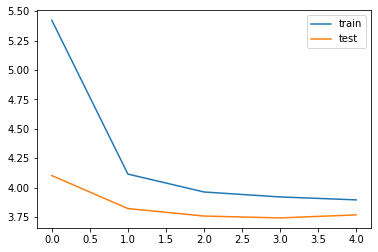

In [44]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [45]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [46]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [47]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        if(np.argmax(output_tokens[0, -1, :])==0):
          sampled_token_index=np.argsort(output_tokens[0, -1, :])[-2]
        else:  
          sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [48]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [49]:
for i in range(0,3):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: socher et al socher et al present framework based recursive neural net works learns vector space representations multi word phrases sentences specifically related work deep learning neural networks successfully employed sentiment analysis sentiment domain adaptation analogous prediction task lin socher et al investigated predicting emotion reader text unlike socher et al utilize manually labeled texts learn meaning phrase compositionality focus learning meaning word namely word embedding massive distant supervised tweets recursive proven effective many sentiment analysis tasks learning compositionality automatically use two unsupervised recursive one source phrase target phrase details found providing richer representations meaning discrete representation approaches successfully applied tasks sentiment analysis topic classification word word similarity previous work classifying snippets include using pre defined polarity rules learning complex models parse trees socher et al in